In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime


<b>Homework</b>
* Create a chart to show how the relative share of various playlist_genres has changed over time
* Create a multiple line chart to show the evolution of the average song properties (only those normalized in the range 0-1 ) over time
* Create a small multiple chart with histograms of track popularity for the different genres. Choose an optimal binning
* Compare the distributions of the average song duration for the different genres using a visualization idiom for statistical analysis
* Create a chart showing the how much the attributes (popularity, danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a proper colormap. 
* visualize a scatter plot with songs released in 2010, representing loudness and danceability on the x-y coordinates, dots colored by genres and using a different mark (pre-attentive) to make a specific artist of your interest evident.
 





In [2]:
songs = pd.read_csv("data/spotify_songs.csv")

# Check row and column numbers

rows = songs.shape[0] 
cols = songs.shape[1]
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))


#print(songs.isnull().sum())
songs = songs.dropna() 

# Adding 'release_year' column
songs['year'] = pd.DatetimeIndex(songs['track_album_release_date']).year.astype(int)

songs['duration'] = songs['duration_ms']/1000
songs.sort_values(by='year', ascending=True)
songs.head()

Rows   : 32833
Columns: 23


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [3]:
#how to sort artists
art = songs.groupby(['track_artist']).agg(
    items=('track_id', 'count'),
    popularity=('track_popularity', 'mean')
).sort_values(by='items', ascending=False)


artsel=art[art["items"]>10]
print(artsel)

                  items  popularity
track_artist                       
Martin Garrix       161   47.204969
Queen               136   43.000000
The Chainsmokers    123   57.699187
David Guetta        110   53.436364
Don Omar            102   41.950980
...                 ...         ...
Duran Duran          11   58.090909
Macross 82-99        11   40.272727
Wolfgang Lohr        11   39.454545
MAX                  11   66.272727
Nio Garcia           11   68.363636

[536 rows x 2 columns]


In [4]:
#how to aggregate data
songagg = songs.groupby(['playlist_genre','year']).agg(
    items=('track_id', 'count'),
    popularity=('track_popularity', 'mean')
).reset_index()

songagg.tail()

,playlist_genre,year,items,popularity
297,rock,2016,77,38.155844
298,rock,2017,116,37.112069
299,rock,2018,129,40.968992
300,rock,2019,577,36.178510
301,rock,2020,48,39.458333


# 1. Create a chart to show how the relative share of various playlist_genres has changed over time

In [5]:
fig = px.line(songagg, x="year", y="items", color="playlist_genre", title="Number of songs per genre over time")
fig.show()

# 2. Create a multiple line chart to show the evolution of the average song properties (only those normalized in the range 0-1 ) over time

In [6]:
songs.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779,2011.136834,225.796830
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346,11.418226,59.836492
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.000000,4.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000,2008.000000,187.804500
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000,2016.000000,216.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000,2019.000000,253.581250
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.000000,517.810000


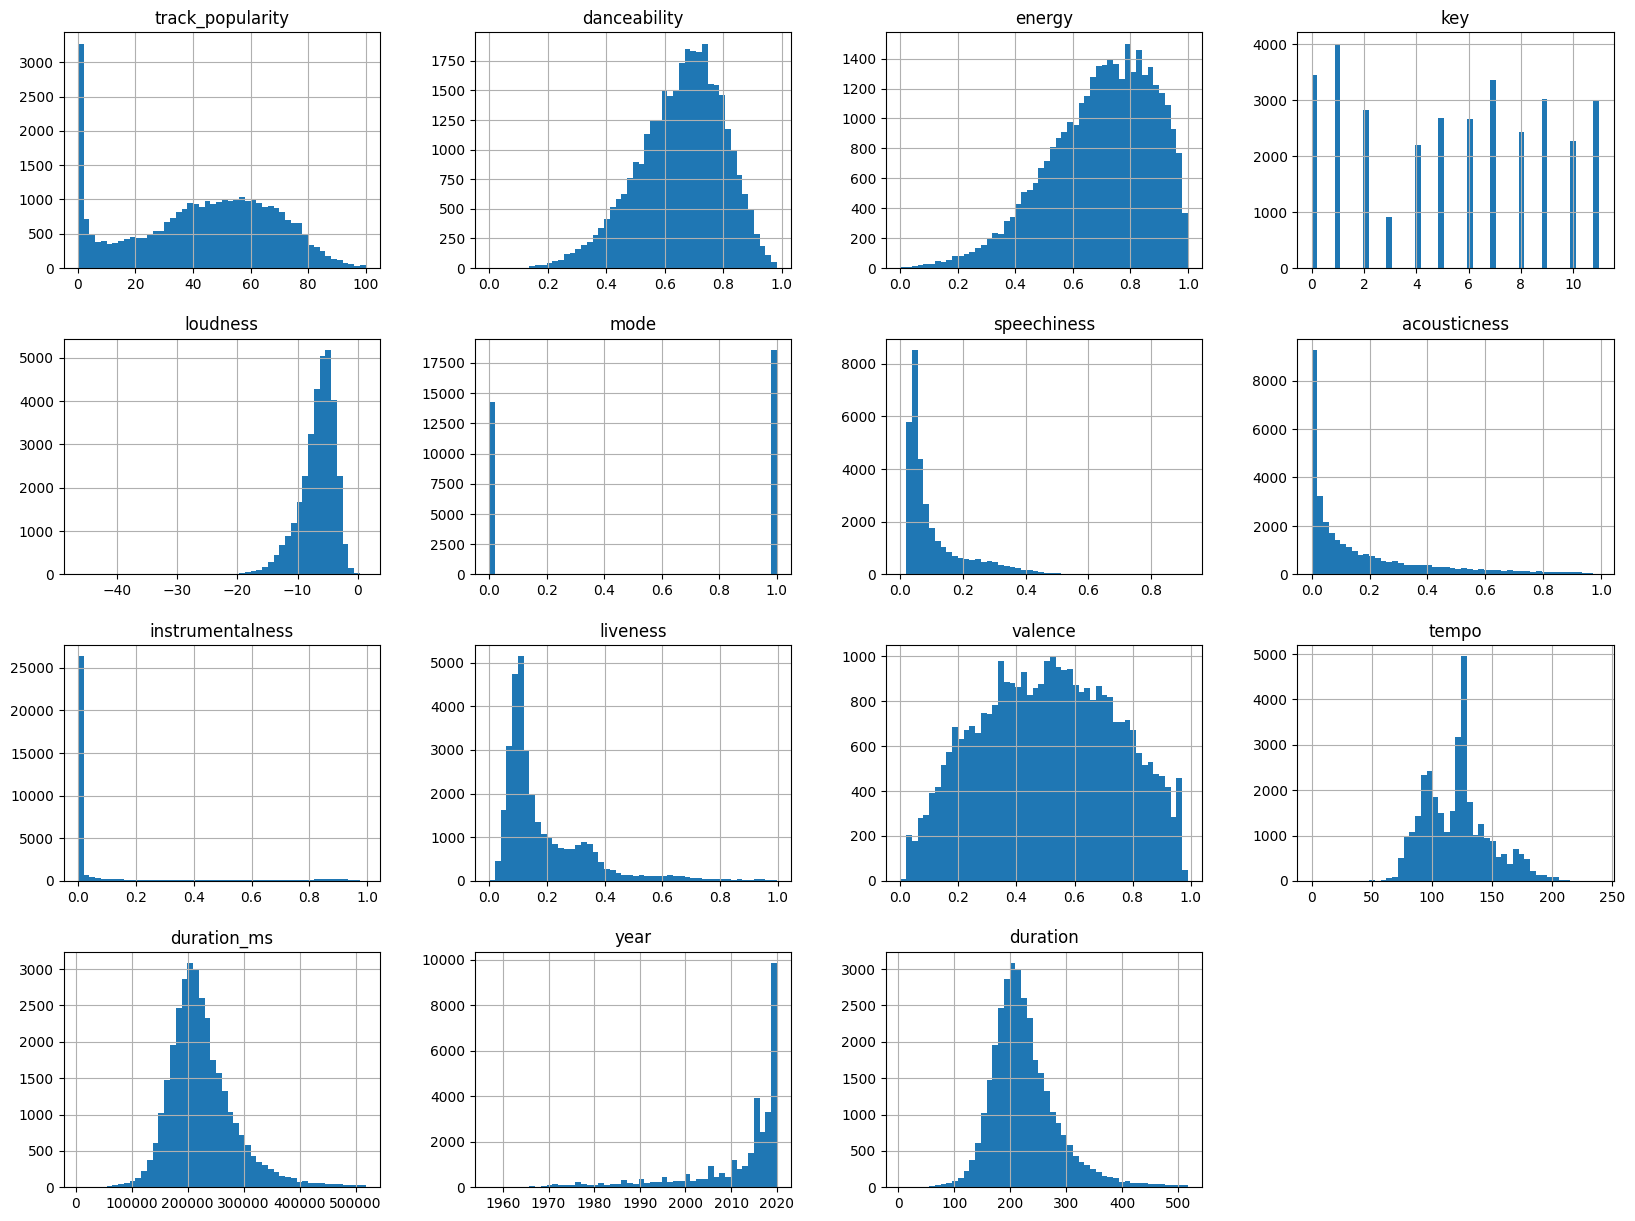

In [7]:
# check is the columns normalize in range 0-1 by histogram of all columns

songs.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# Filter the columns that are normalized in the range 0-1 by looking at the histogram
normalized_columns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Aggregate the data by year and calculate the mean for the normalized columns
normalized_agg = songs.groupby('year')[normalized_columns].mean().reset_index()
normalized_agg.head()

,year,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,1957,0.51950,0.78000,0.08065,0.6025,0.000000,0.07005,0.9115
1,1958,0.64700,0.58200,0.07550,0.4100,0.000002,0.07150,0.9150
2,1960,0.38625,0.46475,0.04485,0.7215,0.000432,0.40100,0.5790
3,1961,0.58500,0.03600,0.04180,0.8590,0.000003,0.09080,0.4330
4,1962,0.81600,0.51400,0.03390,0.7670,0.949000,0.08990,0.9120


In [9]:
# Melt the dataframe to have a long format suitable for plotting
normalized_melted = normalized_agg.melt(id_vars='year', value_vars=normalized_columns, var_name='property', value_name='value')
normalized_melted.head()

,year,property,value
0,1957,danceability,0.51950
1,1958,danceability,0.64700
2,1960,danceability,0.38625
3,1961,danceability,0.58500
4,1962,danceability,0.81600


In [10]:
fig = px.line(normalized_melted, x='year', y='value', color='property', title='Evolution of Average Song Properties Over Time')
fig.show()

# 3. Create a small multiple chart with histograms of track popularity for the different genres. Choose an optimal binning

In [ ]:
genres = songs['playlist_genre'].unique()
genres

# we can see that we have 6 genres in the dataset, so we will make a grid of 2x3 plots

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

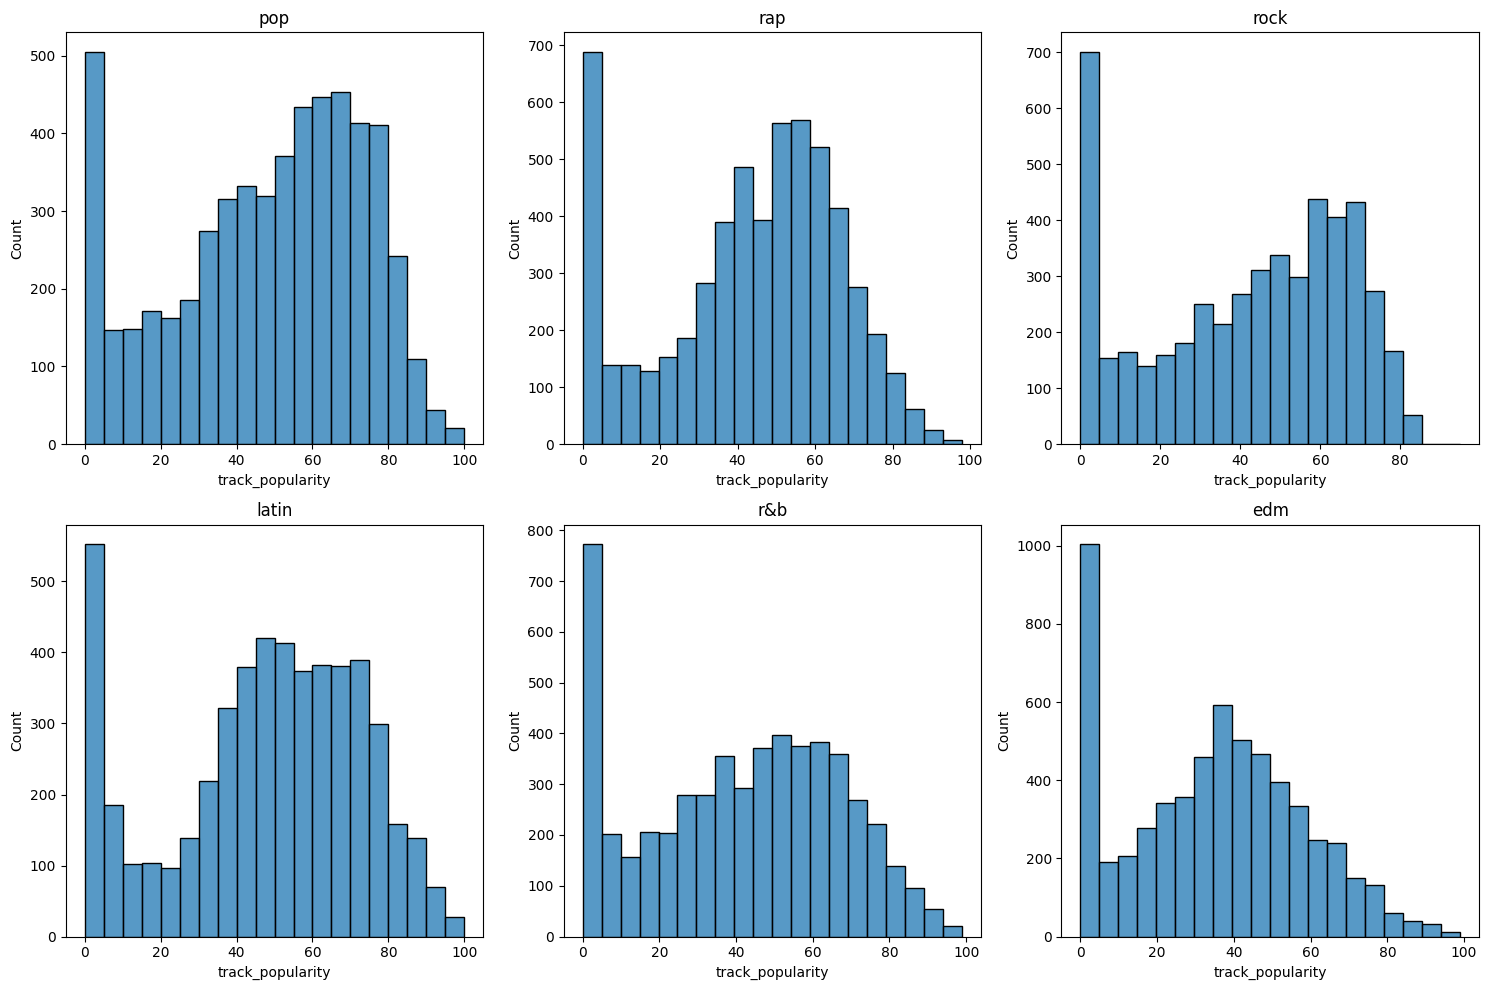

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i, genre in enumerate(songs['playlist_genre'].unique()):
    sns.histplot(songs[songs['playlist_genre'] == genre]['track_popularity'], bins=20, ax=axs[i])
    axs[i].set_title(genre)

plt.tight_layout()
plt.show()

<!-- * Compare the distributions of the average song duration for the different genres using a visualization idiom for statistical analysis
* Create a chart showing the how much the attributes (popularity, danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a proper colormap. 
* visualize a scatter plot with songs released in 2010, representing loudness and danceability on the x-y coordinates, dots colored by genres and using a different mark (pre-attentive) to make a specific artist of your interest evident. -->

In [25]:
# another way to plot the histograms by using plotly

import plotly.graph_objs as go
from plotly.subplots import make_subplots

genres = songs['playlist_genre'].unique()

# Create subplots with 2x3 layout
fig = make_subplots(rows=2, cols=3, subplot_titles=genres)

# Add histograms to the subplots
row = col = 1
for i, genre in enumerate(genres):
    genre_data = songs[songs['playlist_genre'] == genre]
    fig.add_trace(
        go.Histogram(x=genre_data['track_popularity'], nbinsx=20, name=genre),
        row=row, col=col
    )
    
    col += 1
    if col > 3:
        col = 1
        row += 1

# Update layout
fig.update_layout(height=800, width=1000, title_text='Histograms of Track Popularity for Different Genres')
fig.update_xaxes(title_text="Track Popularity")
fig.update_yaxes(title_text="Count")

fig.show()

# 4. Compare the distributions of the average song duration for the different genres using a visualization idiom for statistical analysis

In [26]:
fig = px.box(songs, x='playlist_genre', y='duration', title='Distribution of Average Song Duration for Different Genres')
fig.show()

In [ ]:
fig = px.violin(songs, 
                x='playlist_genre', y='duration', 
                box=True, 
                points='all', 
                title='Comparison of Average Song Duration by Genre',
                labels={'playlist_genre': 'Genre', 'duration': 'Duration'})
fig.show()

# 5. Create a chart showing the how much the attributes (popularity, danceability, energy, loudness, acousticness, instrumentalness, liveness, valence, tempo) are correlated. Use a proper colormap. 

In [43]:
attributes = ['track_popularity', 'danceability', 'energy', 'loudness', 'acousticness', 
              'instrumentalness', 'liveness', 'valence', 'tempo']

correlation_matrix = songs[attributes].corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis' 
))

fig.update_layout(
    title='Correlation Heatmap of Musical Attributes',
    xaxis_nticks=36,
    height=600,
    width=1000
)

fig.show()

# 6. Extra Task: Visualize a scatter plot with songs released in 2010, representing loudness and danceability on the x-y coordinates, dots colored by genres and using a different mark (pre-attentive) to make a specific artist of your interest evident.

In [ ]:
# Filter songs released in 2010
songs_2010 = songs[songs['year'] == 2010]

In [60]:
# get the top 10 artists with the most songs in the dataset 2010

songs_2010.groupby('track_artist')['track_id'].count().sort_values(ascending=False).head(10)

track_artist
Don Omar         21
CASIOPEA         20
Bon Jovi         14
Bruno Mars       11
Rihanna          10
You Me At Six     9
Javiera Mena      9
Katy Perry        8
Ludacris          7
Demi Lovato       7
Name: track_id, dtype: int64

In [ ]:
# Define the specific artist of interest
artist_of_interest = 'Don Omar'

# Create a scatter plot
fig = px.scatter(songs_2010, 
                 x='loudness', 
                 y='danceability',
                 color='playlist_genre',               
                 title='Loudness vs Danceability (2010)',
                 labels={'loudness': 'Loudness', 'danceability': 'Danceability'})

# Highlight the specific artist by color (black) and shape (star)
df_artist = songs_2010[songs_2010['track_artist'] == artist_of_interest]
fig.add_trace(
    go.Scatter(
        x=df_artist['loudness'],
        y=df_artist['danceability'],
        mode='markers',
        marker=dict(
            size=10,
            color='black',
            symbol='star'
        ),
        name=artist_of_interest,
        text=df_artist['track_name']
    )
)

fig.show()